 > Author: **Yash Trivedi**
 
 
 > Task #1  : Prediction using supervised ML

# Predicting percentage of students using number of hours studies

#   **Loading data**

Import necessary libraries for data cleaning and visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [49]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No missing values in the dataset.

# Data Visualization

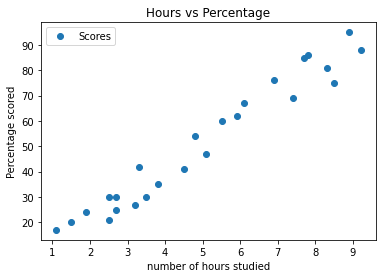

In [5]:
data.plot(x= "Hours",y = "Scores",style="o")
plt.title("Hours vs Percentage")
plt.xlabel("number of hours studied")
plt.ylabel("Percentage scored")
plt.show()

Scatter plot shows no outliers in the data given. Also it is quit clear that model is linear. Thus, as number of hours studied increases percentage of student increases linearly. Hence we will predict using Linear Regression.

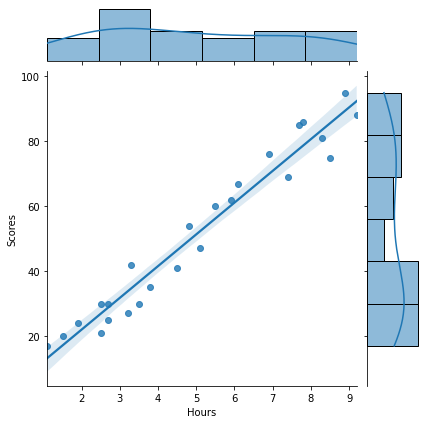

In [8]:
sns.jointplot(x = "Hours",y ="Scores",data = data, kind="reg")
plt.show()

> Splitting Data

In [10]:
y = data["Scores"]
X = data[["Hours"]]


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [43]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 100)

In [44]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((18, 1), (18,), (7, 1), (7,))

# Linear Regression Model

Finding coefficients of linear regression model. Intercept is B0 and coefficient is B1.

In [45]:
from sklearn.linear_model import LinearRegression

Linear_regression = LinearRegression()
Linear_regression.fit(X_train,y_train)
print(Linear_regression.intercept_, Linear_regression.coef_)

1.8709042159763456 [9.85419749]


For chosen random state and train split, we get B0 as 1.87 and B1 as 9.85. Thus our linear regression model is

> 
***y = 1.87*x + 9.85**

# RSquared (Perfomance) value of model

In [46]:
y_predict = Linear_regression.predict(X_test)
r2_score(y_test,y_predict)

0.9403157736545141

In [47]:
y_predict_train = Linear_regression.predict(X_train)
r2_score(y_train,y_predict_train)

0.9550521319661627

# Score Prediction for 9.25 Hrs/day

In [48]:
print(Linear_regression.predict([[9.25]]))

[93.02223095]
